## Урок 7

### Многомерный статистический анализ. Линейная регрессия

#### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

$$y = a + bx$$

$$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$$

$$a = \overline{y} - b \cdot {\overline{x}}.$$

In [1]:
import numpy as np
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

а. С интерсептом

In [2]:
my_b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
my_b

2.620538882402765

In [4]:
my_a = np.mean(y) - my_b * np.mean(x)
my_a

444.1773573243596

In [5]:
y_hat = my_a + my_b * x
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

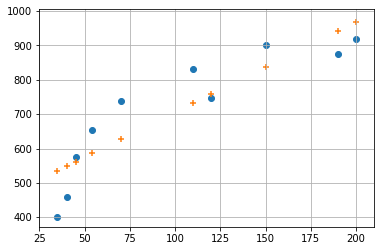

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.scatter(x, y_hat, marker='+')
plt.grid()

б. Без интерсепта

$$ B = (X^T * X)^{-1} * X^T * Y$$

In [7]:
my_X = x.reshape((10, 1))
my_Y = y.reshape((10, 1))

In [8]:
B = np.dot(np.linalg.inv(np.dot(my_X.T, my_X)), my_X.T @ my_Y)
B

array([[5.88982042]])

#### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [11]:
def mse_(B1, y=y, X=x, n=10):
    return np.sum((B1 * X - y) ** 2) / n

In [14]:
B1 = 0.1

alpha = 1e-6

for i in range(2000):
    B1 -= alpha * (2 / len(x)) * np.sum((B1 * x - y) * x)
    if i % 100 == 0:
        print(f'Итерация № {i}, B1 = {B1}, mse = {mse_(B1)}')

Итерация № 0, B1 = 0.25952808, mse = 493237.7212546963
Итерация № 100, B1 = 5.54537842245223, mse = 58151.31823171113
Итерация № 200, B1 = 5.868748638669329, mse = 56522.97550129376
Итерация № 300, B1 = 5.888531320728348, mse = 56516.88130936019
Итерация № 400, B1 = 5.8897415574471985, mse = 56516.85850140053
Итерация № 500, B1 = 5.889815595583751, mse = 56516.858416040064
Итерация № 600, B1 = 5.889820124983314, mse = 56516.85841572062
Итерация № 700, B1 = 5.889820402076462, mse = 56516.85841571941
Итерация № 800, B1 = 5.88982041902807, mse = 56516.8584157194
Итерация № 900, B1 = 5.889820420065112, mse = 56516.85841571941
Итерация № 1000, B1 = 5.8898204201285544, mse = 56516.85841571941
Итерация № 1100, B1 = 5.889820420132437, mse = 56516.85841571943
Итерация № 1200, B1 = 5.889820420132673, mse = 56516.85841571943
Итерация № 1300, B1 = 5.889820420132673, mse = 56516.85841571943
Итерация № 1400, B1 = 5.889820420132673, mse = 56516.85841571943
Итерация № 1500, B1 = 5.889820420132673, mse

#### 3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента? 

Таблица значений функции Лапласа используется в случаях, когда  известна 𝜎(cигма) генеральной совокупности,

Таблица критических точек распределения Стьюдент используется, если не известна 𝜎(cигма) генеральной совокупности.